In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

### Loading data

In [2]:
df = pd.read_csv('Breast_cancer.csv')

### Checking missing values

In [3]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Removing duplicates


In [5]:
df.drop_duplicates(inplace=True)

### Removing unecessary columns

In [6]:
df.drop(columns=['id','Unnamed: 32'], inplace=True)

### Discovering columns type

In [7]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
text_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

print("\nText Columns:")
print(text_columns)


Numerical Columns:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Text Columns:
['diagnosis']


### Converting 'diagnosis' column to a binary variable

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

### Checking data balance

In [9]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

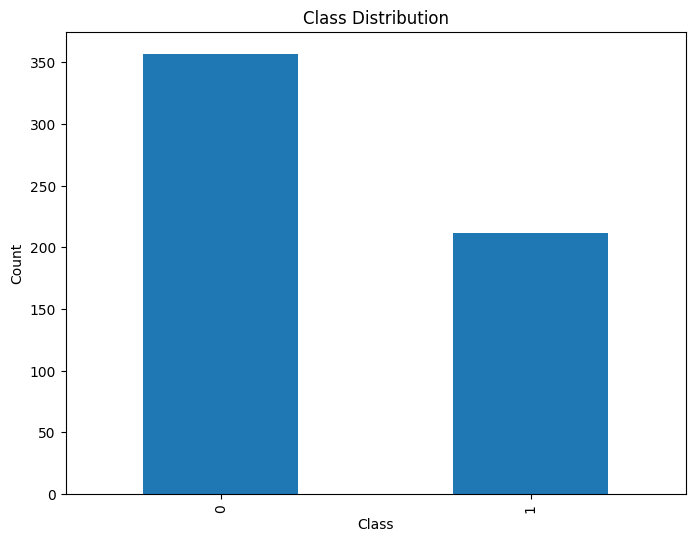

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['diagnosis'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


### Performing SMOTE

In [11]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Feature selection (Chi-squared)

In [12]:
selector = SelectKBest(chi2, k=5)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

In [13]:
selector.fit(X_train_resampled, y_train_resampled)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')


### Logistic regression

In [14]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_selected, y_train_resampled)
lr_preds = lr_model.predict(X_test_selected)
print("Prediction of Logistic regression:", lr_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))

Prediction of Logistic regression: [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
Logistic Regression Accuracy: 0.9912280701754386

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      1.00      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### SVM

In [15]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_selected, y_train_resampled)
svm_preds = svm_model.predict(X_test_selected)
print("Prediction of SVM:", svm_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_preds))

Prediction of SVM: [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
SVM Accuracy: 0.9912280701754386

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      1.00      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### Decision trees

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected, y_train_resampled)
dt_preds = dt_model.predict(X_test_selected)
print("Prediction of Decision Tree:", dt_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_accuracy)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_preds))

Prediction of Decision Tree: [0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
Decision Tree Accuracy: 0.9385964912280702

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



### KNN

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train_resampled)
knn_preds = knn_model.predict(X_test_selected)
print("Prediction of KNN:", knn_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_accuracy)
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_preds))

Prediction of KNN: [0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
KNN Accuracy: 0.9473684210526315

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [18]:
### Saving the best model ###

# Saving model to disk
pickle.dump(svm_model, open('model.pkl','wb'))